<a href="https://colab.research.google.com/github/Akintoyeai/Depression-analysis/blob/main/Tweets_Depression_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import json
import tensorflow as tf
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 40000
embedding_dim = 16
max_length = 30
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [ ]:
pip install kaggle


In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download  kazanova/sentiment140

 72% 58.0M/80.9M [00:00<00:00, 207MB/s]
100% 80.9M/80.9M [00:00<00:00, 210MB/s]


In [ ]:
! unzip /content/sentiment140.zip

Archive:  /content/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
#     -O /tmp/sarcasm.json


In [ ]:
import csv
import json

In [ ]:
# import csv 
# import json 

# def csv_to_json(csvFilePath, jsonFilePath):
#     jsonArray = []
      
#     #read csv file
#     with open(csvFilePath, encoding='latin-1') as csvf: 
#         #load csv file data using csv library's dictionary reader
#         csvReader = csv.DictReader(csvf) 

#         #convert each csv row into python dict
#         for row in csvReader: 
#             #add this python dict to json array
#             jsonArray.append(row)
  
#     #convert python jsonArray to JSON String and write to file
#     with open(jsonFilePath, 'w', encoding='latin-1') as jsonf: 
#         jsonString = json.dumps(jsonArray, indent=4)
#         jsonf.write(jsonString)
          
# csvFilePath = r'training.csv'
# jsonFilePath = r'data.json'
# csv_to_json(csvFilePath, jsonFilePath)

In [ ]:
import os

# Absolute path of a file
old_name = r"/content/training.1600000.processed.noemoticon.csv"
new_name = r"training.csv"

# Renaming the file
os.rename(old_name, new_name)

In [ ]:
#Filtering out stopwords that are too common and don't add any meaning
from bs4 import BeautifulSoup
import string
# soup= BeautifulSoup(sentence)
# sentence = soup.get_text()
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)




In [ ]:
import csv
sentences=[]
labels=[]
with open('/content/training.csv', encoding='latin-1') as csvfile:
  reader = csv.reader(csvfile, delimiter=",")
  for row in reader:
    labels.append(int(row[0]))
    sentence = row[5].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    
print(len(labels))
print(len(sentences))

1600000
1600000


In [ ]:
# importing python package
import pandas as pd
  
# read contents of csv file
file = pd.read_csv("training.csv" , encoding='latin-1')
print("\nOriginal file:")
print(file)
  
# adding header
headerList = ["Target1", "ID", "Date", "Flag", "User", "Text1"]
  
# converting data frame to csv
file.to_csv("training.csv", header=headerList, index=False)
  
# display modified csv file
file2 = pd.read_csv("training.csv" , encoding='latin-1')
print('\nModified file:')
print(file2)


Original file:
         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
0        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...     ..         ...                           ...       ...   
1599994  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
0          scotthamilton   
1               mattycus   
2                ElleCTF   
3                 Karoli   
4               joy_wolf   
...                  ..

In [ ]:
file2['Target1'] = file2['Target1'].replace([4],1)

In [ ]:
file2.dtypes

Target1     int64
ID          int64
Date       object
Flag       object
User       object
Text1      object
dtype: object

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
file2.head()

,Target1,ID,Date,Flag,User,Text1
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
item_counts = file2["Target1"].value_counts()
print(item_counts)

1    800000
0    799999
Name: Target1, dtype: int64


In [ ]:
# file2.to_csv('file_name.csv')

In [ ]:
# def csv_to_json(csvFilePath, jsonFilePath):
#     jsonArray = []
      
#     #read csv file
#     with open(csvFilePath, encoding='latin-1') as csvf: 
#         #load csv file data using csv library's dictionary reader
#         csvReader = csv.DictReader(csvf) 

#         #convert each csv row into python dict
#         for row in csvReader: 
#             #add this python dict to json array
#             jsonArray.append(row)
  
#     #convert python jsonArray to JSON String and write to file
#     with open(jsonFilePath, 'w', encoding='latin-1') as jsonf: 
#         jsonString = json.dumps(jsonArray, indent=4)
#         jsonf.write(jsonString)
          
# csvFilePath = r'file_name.csv'
# jsonFilePath = r'data.json'
# csv_to_json(csvFilePath, jsonFilePath)

In [ ]:
# app.py

import pandas as pd

# Creating Dataframe

# Convert DataFrame to JSON
data = file2.to_json('./export.json', orient='records')
print(data)

None


In [ ]:
with open("/content/export.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item["Text1"])
    labels.append(item['Target1'])

In [ ]:
training_sentences1 = sentences[0:799000]
training_sentences2 = sentences[801000:1600000]
training_sentences = training_sentences1 + training_sentences2

testing_sentences = sentences[799000:801000]

training_labels1 = labels[0:799000]
training_labels2 = labels[801000:1600000]
training_labels = training_labels1 + training_labels2

testing_labels = labels[799000:801000]

In [ ]:
# training_sentences = sentences[0:1600000:2]
# testing_sentences = sentences[1:1600000:2]
# training_labels = labels[0:1600000:2]
# testing_labels = labels[1:1600000:2]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate = 0.00001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 16)            640000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 30, 32)           4224      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 651,313
Trainable params: 651,313
Non-tr

In [ ]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
49938/49938 - 1373s - loss: 0.4069 - accuracy: 0.8133 - val_loss: 0.3298 - val_accuracy: 0.8605 - 1373s/epoch - 28ms/step
Epoch 2/10
49938/49938 - 1355s - loss: 0.3663 - accuracy: 0.8362 - val_loss: 0.3154 - val_accuracy: 0.8590 - 1355s/epoch - 27ms/step
Epoch 3/10
49938/49938 - 1360s - loss: 0.3484 - accuracy: 0.8457 - val_loss: 0.3052 - val_accuracy: 0.8640 - 1360s/epoch - 27ms/step
Epoch 4/10
49938/49938 - 1358s - loss: 0.3360 - accuracy: 0.8525 - val_loss: 0.3182 - val_accuracy: 0.8550 - 1358s/epoch - 27ms/step
Epoch 5/10


KeyboardInterrupt: ignored

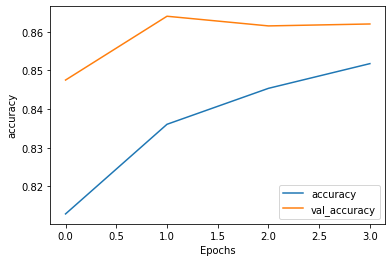

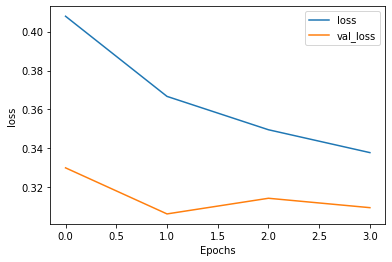

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

is upset that he can't update his facebook by texting it and might cry as a result school today also blah ? ? ? ? ? ? ? ? ?
my whole body feels itchy and like its on fire 
0


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(40000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = ["I am happy", "The thing about the situation that I'm in right now is that i do not know what to do and it is making me gutted like i should just run away from everyone and everything"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.99102235]
 [0.06591507]]


In [ ]:
model.save('gfgModel.h5')

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            640000    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 645,041
Trainable params: 645,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 21%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 67%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 90%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 90%)


In [ ]:
new_model2 = tf.keras.models.load_model('/content/gfgModel.h5')

# Check its architecture
new_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            640000    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 645,041
Trainable params: 645,041
Non-trainable params: 0
_________________________________________________________________
